# Import Library & Load Data Ini memenuhi syarat "Data Loading"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data_raw/customer_churn_dataset-training-master.csv')

print("Data Loading Berhasil!")
display(df.head())

Data Loading Berhasil!


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


# Exploratory Data Analysis (EDA)

In [2]:
# Cek info dataset (tipe data dan null values)
print("Info Dataset:")
df.info()

# Cek apakah ada missing value
print("\nJumlah Missing Value per Kolom:")
print(df.isnull().sum())

# Cek apakah ada data duplikat
print(f"\nJumlah Data Duplikat: {df.duplicated().sum()}")

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB

Jumlah Missing Value per Kolom:
CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequ

# EDA - Visualisasi Target (Churn)

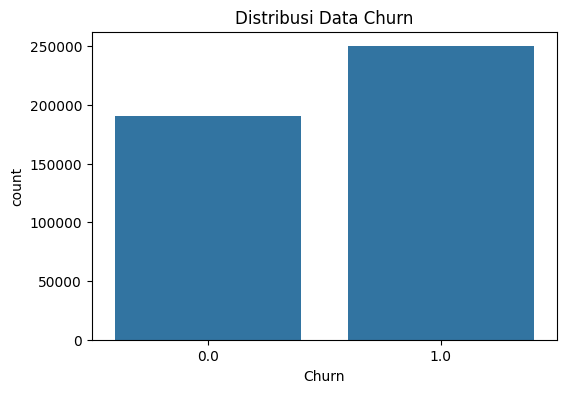

In [3]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn')
plt.title('Distribusi Data Churn')
plt.show()

# Data Preprocessing - Cleaning

In [4]:
# 1. Hapus kolom yang tidak relevan untuk prediksi (ID customer)
# Sesuaikan nama kolom jika berbeda, biasanya 'CustomerID'
if 'CustomerID' in df.columns:
    df = df.drop(columns=['CustomerID'])
    print("Kolom CustomerID dihapus.")

# 2. Hapus data duplikat jika ada
if df.duplicated().sum() > 0:
    df = df.drop_duplicates()
    print("Data duplikat dihapus.")

# 3. Handle Missing Values (jika ada)
# Untuk eksperimen sederhana, kita drop saja baris yang kosong (jika jumlahnya sedikit)
df = df.dropna()
print("Missing values ditangani (dropna).")

Kolom CustomerID dihapus.
Missing values ditangani (dropna).


# Data Preprocessing - Encoding & Simpan Hasil

In [5]:
from sklearn.preprocessing import LabelEncoder

# Deteksi kolom kategorikal (object)
cat_columns = df.select_dtypes(include=['object']).columns

print(f"Kolom Kategorikal yang akan di-encode: {list(cat_columns)}")

# Lakukan Label Encoding
le = LabelEncoder()
for col in cat_columns:
    df[col] = le.fit_transform(df[col])

print("\nData setelah encoding:")
display(df.head())

# Simpan hasil preprocessing ke folder preprocessing (WAJIB untuk bukti)
df.to_csv('preprocessing/customer_churn_cleaned.csv', index=False)
print("File hasil preprocessing tersimpan di folder 'preprocessing/'")

Kolom Kategorikal yang akan di-encode: ['Gender', 'Subscription Type', 'Contract Length']

Data setelah encoding:


,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1.0
1,65.0,0,49.0,1.0,10.0,8.0,0,1,557.0,6.0,1.0
2,55.0,0,14.0,4.0,6.0,18.0,0,2,185.0,3.0,1.0
3,58.0,1,38.0,21.0,7.0,7.0,2,1,396.0,29.0,1.0
4,23.0,1,32.0,20.0,5.0,8.0,0,1,617.0,20.0,1.0


File hasil preprocessing tersimpan di folder 'preprocessing/'
